In [14]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, pairwise
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline 
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
import graphviz

In [15]:
wine_df = pd.read_csv('redwine.csv', sep=';')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
wine_df.shape

(1599, 12)

In [17]:
#Show the top rows of the dataframe
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Display the last five rows of the dataframe.
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [19]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
wine_df.columns = [s.strip().replace(' ', '_') for s in wine_df.columns]
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
np.round(wine_df.describe(), decimals=2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [22]:
wine_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [23]:
print(wine_df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


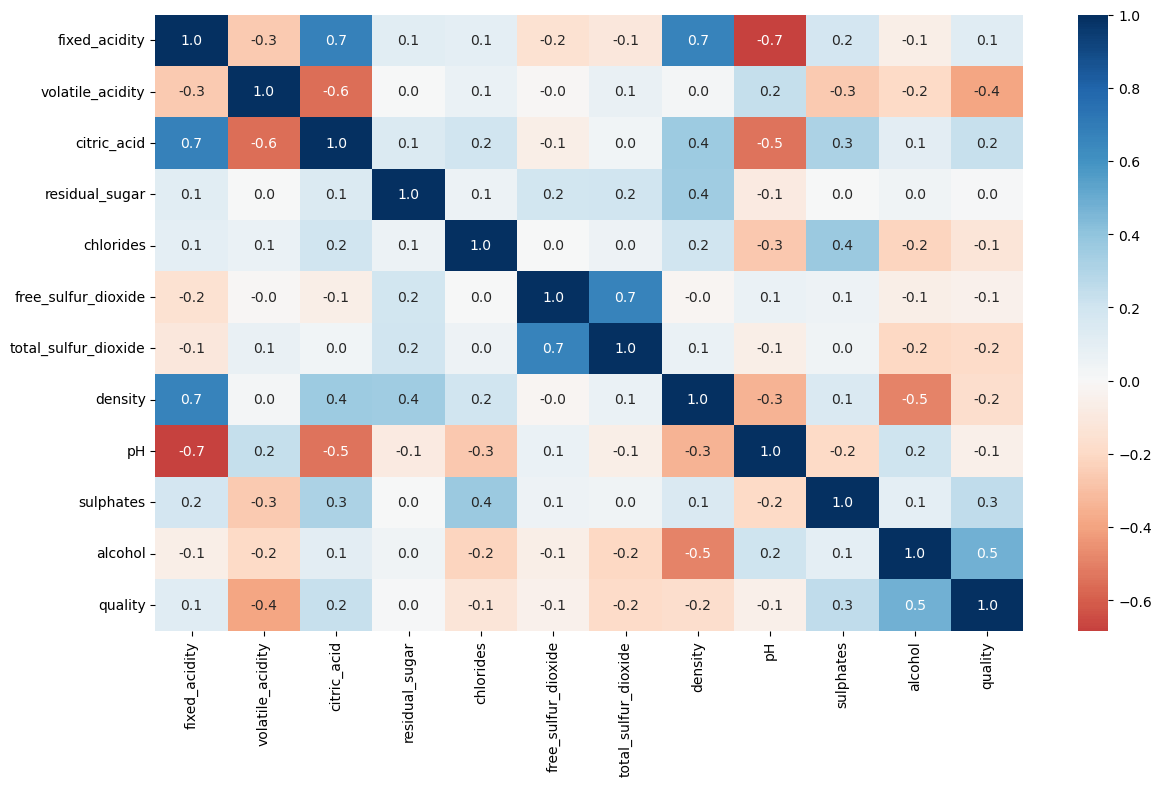

In [24]:
# Include information about values
corr = wine_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

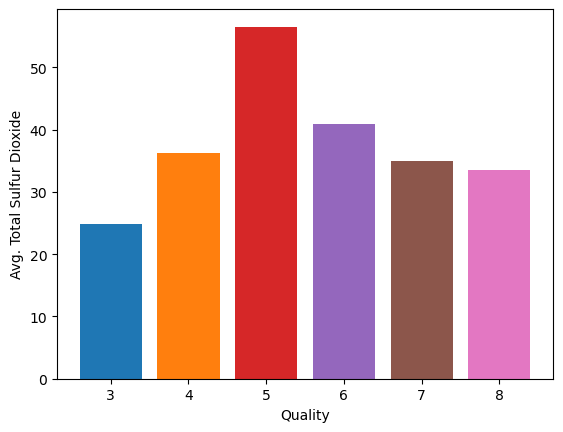

In [26]:
dataForPlot = wine_df.groupby('quality').mean().total_sulfur_dioxide
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C0','C1','C3','C4','C5','C6'])
ax.set_xticks([3, 4, 5, 6, 7, 8])
ax.set_xlabel('Quality')
ax.set_ylabel('Avg. Total Sulfur Dioxide')
plt.show()

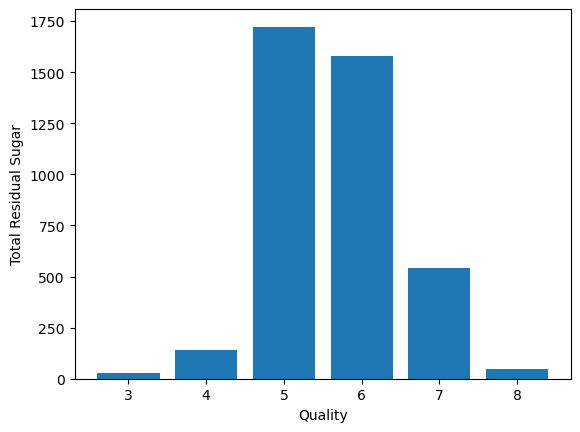

In [27]:
dataForPlot = wine_df.groupby('quality').sum().residual_sugar
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C0'])
ax.set_xticks([3, 4, 5, 6, 7, 8])
ax.set_xlabel('Quality')
ax.set_ylabel('Total Residual Sugar')
plt.show()

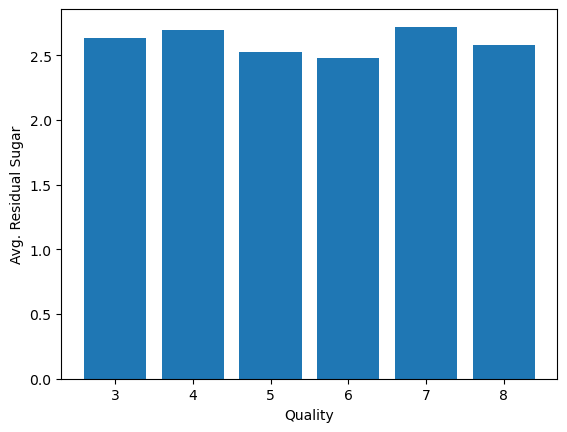

In [73]:
dataForPlot = wine_df.groupby('quality').mean().residual_sugar
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C0'])
ax.set_xticks([3, 4, 5, 6, 7, 8])
ax.set_xlabel('Quality')
ax.set_ylabel('Avg. Residual Sugar')
plt.show()

C:\Users\anton\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


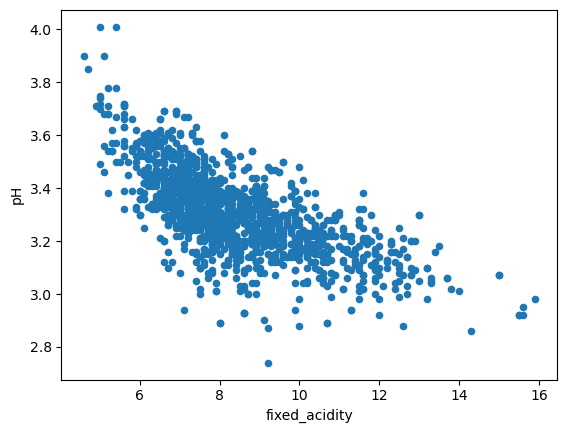

In [67]:
wine_df.plot.scatter(x='fixed_acidity', y='pH', legend=False)
plt.show()

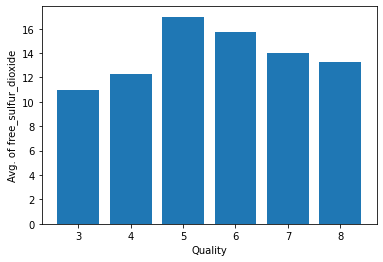

In [12]:
dataForPlot = wine_df.groupby('quality').mean().free_sulfur_dioxide
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C0'])
ax.set_xticks([3, 4, 5, 6, 7, 8])
ax.set_xlabel('Quality')
ax.set_ylabel('Avg. of free_sulfur_dioxide')
plt.show()

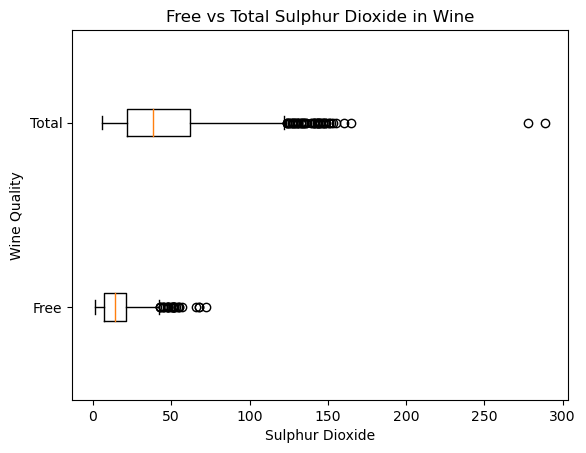

In [69]:
plt.boxplot([wine_df['free_sulfur_dioxide'], wine_df['total_sulfur_dioxide']], vert=False)

plt.xlabel('Sulphur Dioxide')
plt.ylabel('Wine Quality')
plt.title('Free vs Total Sulphur Dioxide in Wine')
plt.yticks([1, 2], ['Free', 'Total'])

plt.show()

In [40]:
wine_df = wine_df.drop(['free_sulfur_dioxide'], axis=1)
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

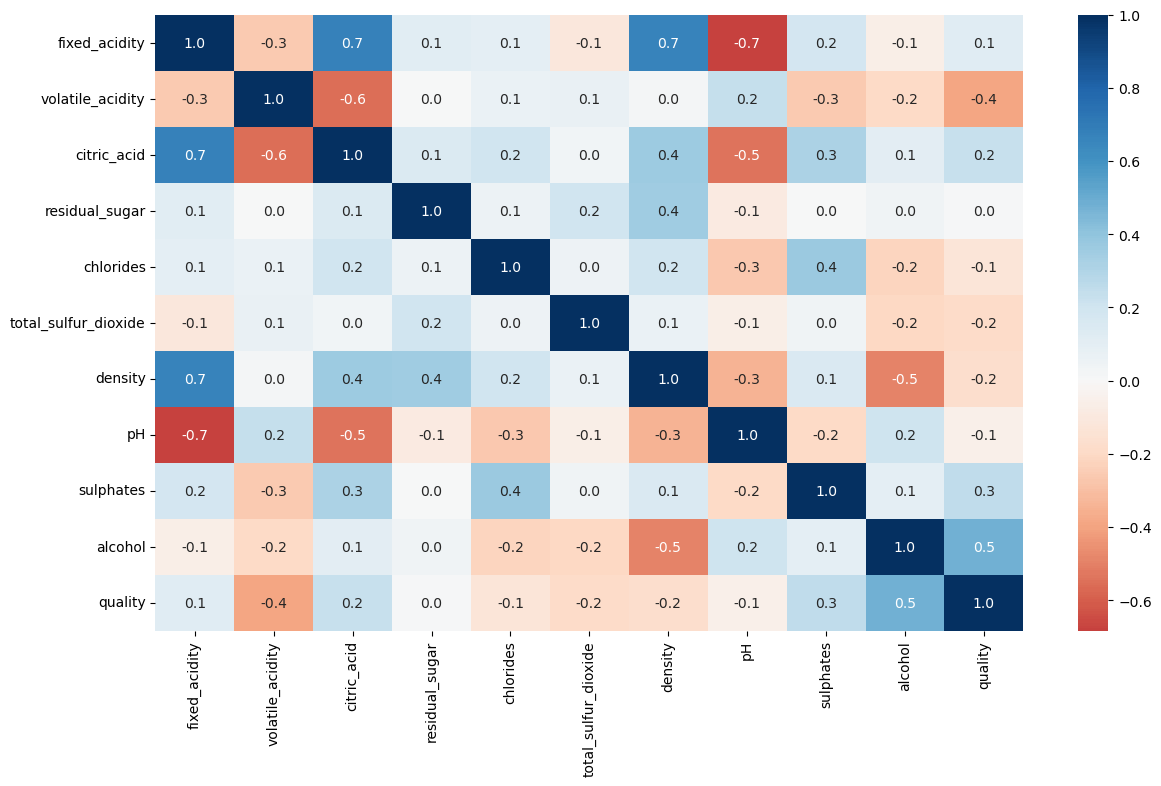

In [41]:
corr = wine_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [42]:
wine_df = wine_df.drop(['pH'], axis=1)
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

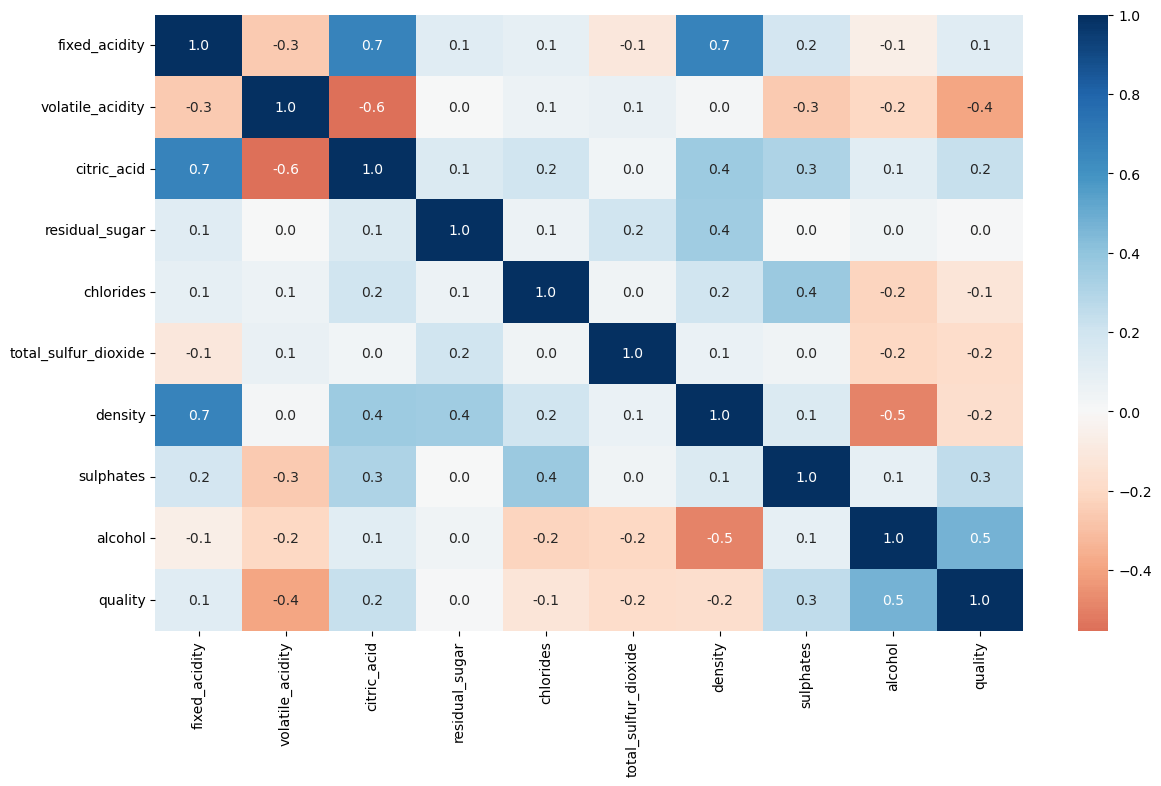

In [43]:
corr = wine_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

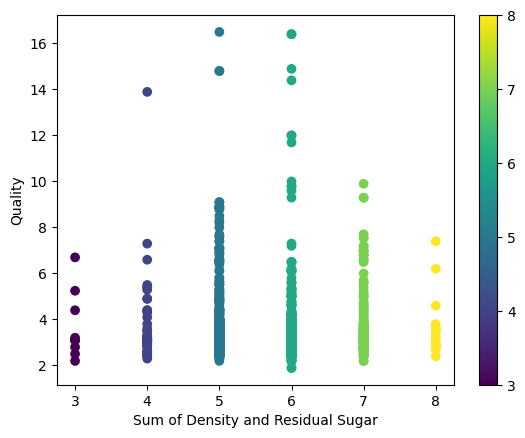

In [44]:
# Calculate the sum of density and sum of residual sugar for each row
wine_df['sum_density_residual_sugar'] = wine_df['density'] + wine_df['residual_sugar']

# Create a scatter plot with quality as the color of each point
plt.scatter(wine_df['quality'],wine_df['sum_density_residual_sugar'],  c=wine_df['quality'])
plt.xlabel('Sum of Density and Residual Sugar')
plt.ylabel('Quality')
plt.colorbar()
plt.show()

<Axes: xlabel='fixed_acidity', ylabel='Count'>

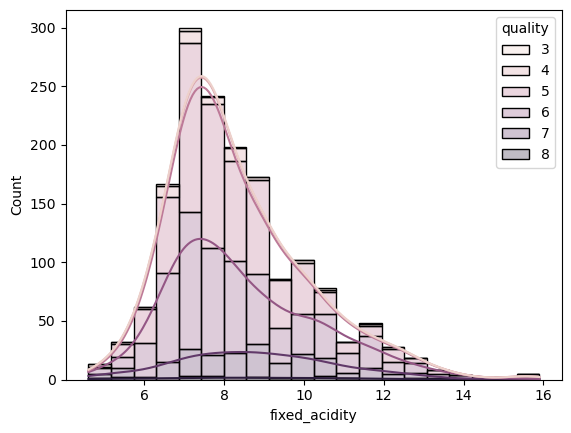

In [45]:
sns.histplot(data=wine_df, x=wine_df.fixed_acidity, hue="quality", kde=True, bins=20, multiple="stack", alpha=.3)

In [13]:
def quality(variables):
    plt.figure(figsize=(16, 5))
    sns.histplot(data=wine_df, x=variables, hue="quality", kde=True,bins=20)
    if quality == "density": plt.title(f"\n{variables} of red wine\n\n")
    else: plt.title(f"\n{variables} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{wine_df[variables].describe()}')
    sns.despine()

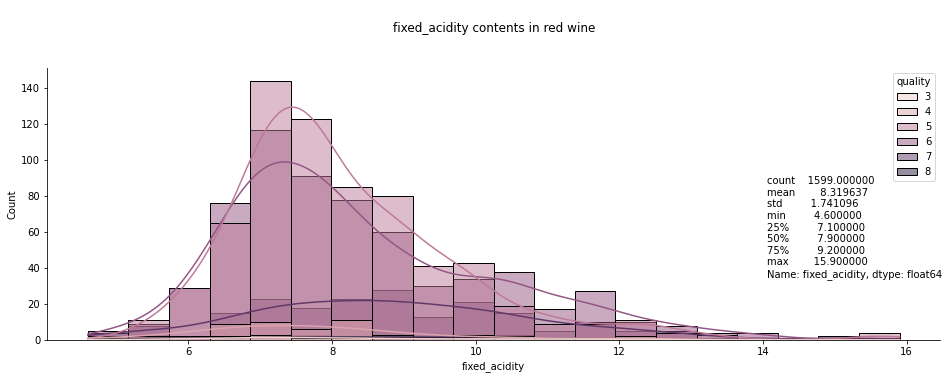

In [14]:
quality("fixed_acidity")

C:\Users\anton\AppData\Local\Temp\ipykernel_33812\1203680082.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataForPlot.index, rotation=90)


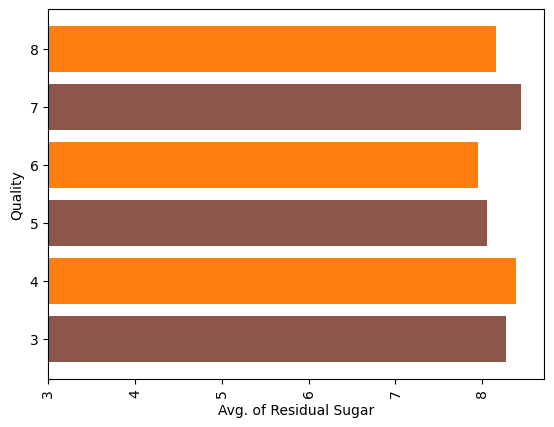

In [48]:
#bar chart of average quantity ordered per country
dataForPlot = wine_df.groupby('quality').mean().residual_sugar
fig, ax = plt.subplots()
ax.barh(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticklabels(dataForPlot.index, rotation=90)
ax.set_xlabel('Avg. of Residual Sugar')
ax.set_ylabel('Quality')
plt.show()

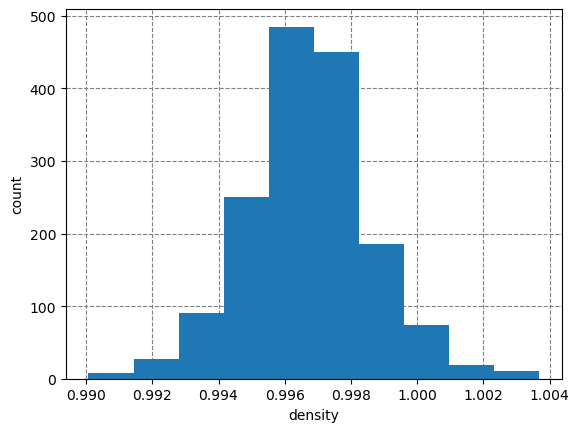

In [50]:
fig, ax = plt.subplots()
ax.hist(wine_df.density)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('density')
ax.set_ylabel('count')
plt.show()

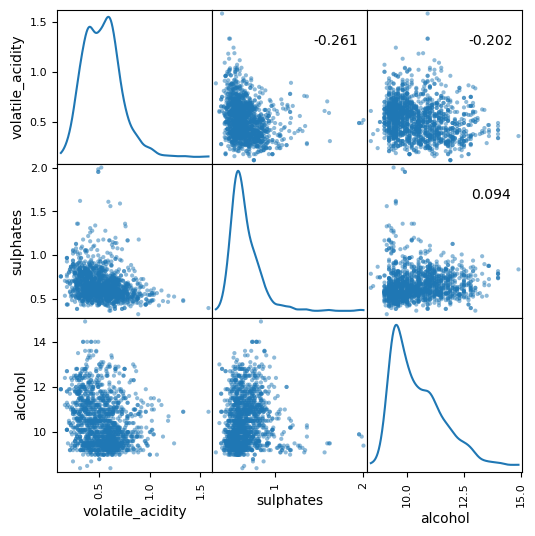

In [52]:
# Add the correlation coefficient to the scatterplots above the diagonal
from pandas.plotting import scatter_matrix, parallel_coordinates
df = wine_df[['volatile_acidity', 'sulphates', 'alcohol']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde') #kde is for density plots, you can use "hist" for histogram
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

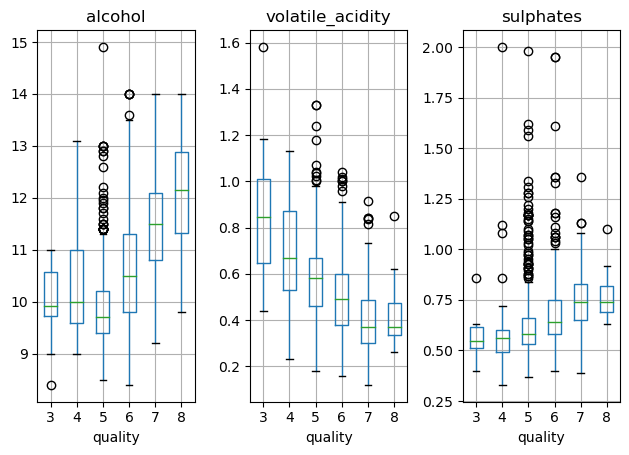

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3)
wine_df.boxplot(column='alcohol', by='quality', ax=axes[0])
wine_df.boxplot(column='volatile_acidity', by='quality', ax=axes[1])
wine_df.boxplot(column='sulphates', by='quality', ax=axes[2])
for ax in axes:
    ax.set_xlabel('quality')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [134]:
wine_df = pd.read_csv('redwine.csv', sep=';')
#print(wine_df.iloc[:, :7])
wine_df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [139]:
wine_df = wine_df.drop(['total sulfur dioxide', 'citric acid'], axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [141]:
wine_df.kurt(numeric_only=True)

fixed acidity           1.132143
volatile acidity        1.225542
residual sugar         28.617595
chlorides              41.715787
free sulfur dioxide     2.023562
density                 0.934079
pH                      0.806943
sulphates              11.720251
alcohol                 0.200029
quality                 0.296708
dtype: float64

<Axes: >

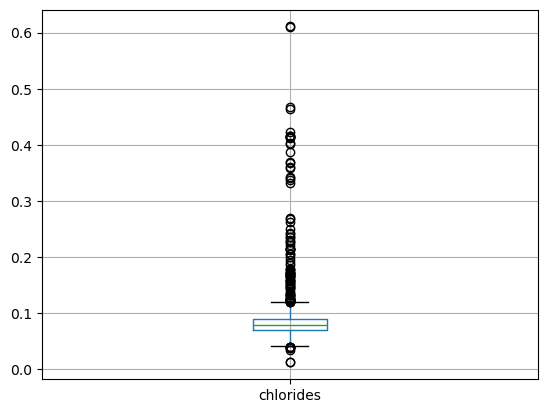

In [142]:
wine_df.boxplot(column=['chlorides'])

<Axes: >

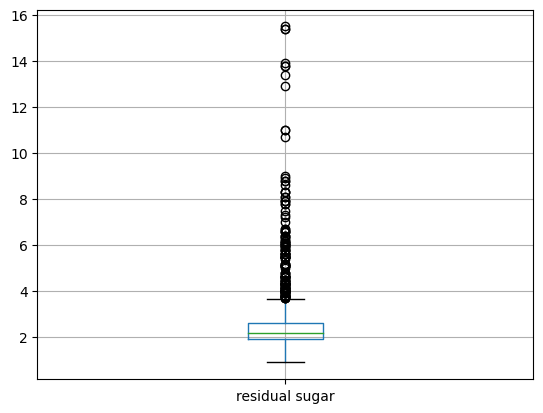

In [143]:
Q1 = wine_df['residual sugar'].quantile(0.25)
Q3 = wine_df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

good_row = []
for idx, row in wine_df.iterrows():
    if (row['residual sugar'] >= (Q1 - 1.5 * IQR)) | (row['residual sugar'] <= (Q3 + 1.5 * IQR)):
        good_row.append(row)
wine_good_df = pd.DataFrame.from_dict(good_row)
    



#wine_df['drop_flag'] = False
#wine_df['residual sugar'] = wine_df['residual sugar'][~((wine_df['residual sugar'] < (Q1 - 1.5 * IQR)) |(wine_df['residual sugar'] > (Q3 + 1.5 * IQR)))]

#wine_df['drop_flag'] =  (( wine_df['residual sugar'] < (Q1 - 1.5 * IQR)) | (wine_df['residual sugar'] > (Q3 + 1.5 * IQR)))
#wine_df.drop(wine_df.loc[wine_df['drop_flag']==True].index, inplace=False)

#df2 = wine_df[wine_df.drop_flag == False]

wine_good_df.boxplot(column=['residual sugar'])

In [144]:
wine_good_df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0


In [13]:
'''Q1 = wine_df['chlorides'].quantile(0.25)
print(Q1)
Q3 = wine_df['chlorides'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
wine_df['chlorides'] = wine_df['chlorides'][~((wine_df['chlorides'] < (Q1 - 1.5 * IQR)) |(wine_df['chlorides'] > (Q3 + 1.5 * IQR)))]

wine_df.boxplot(column=['chlorides'])'''

"Q1 = wine_df['chlorides'].quantile(0.25)\nprint(Q1)\nQ3 = wine_df['chlorides'].quantile(0.75)\nprint(Q3)\nIQR = Q3 - Q1\nwine_df['chlorides'] = wine_df['chlorides'][~((wine_df['chlorides'] < (Q1 - 1.5 * IQR)) |(wine_df['chlorides'] > (Q3 + 1.5 * IQR)))]\n\nwine_df.boxplot(column=['chlorides'])"

<Axes: >

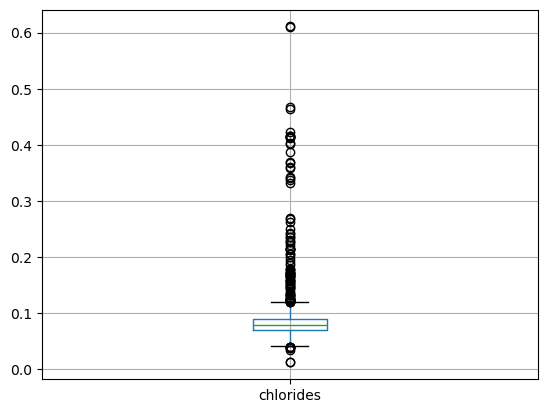

In [145]:
wine_good_df.boxplot(column=['chlorides'])

In [146]:
wine_good_df.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,2.538806,0.087467,15.874922,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,1.409928,0.047065,10.460157,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.900000,0.012000,1.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,14.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,21.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,72.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [147]:
wine_good_df['residual sugar'].shape

(1599,)

In [148]:
wine_good_df.dtypes

fixed acidity          float64
volatile acidity       float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
density                float64
pH                     float64
sulphates              float64
alcohol                float64
quality                float64
dtype: object

In [18]:

'''# Normalize the data columns
wine_df_norm = (wine_df - wine_df.mean()) / wine_df.std()

# compute normalized distance based on Sales and Fuel Cost
#d_norm = pairwise.pairwise_distances(wine_df_norm[['Sales', 'Fuel_Cost']]
                                     #metric='euclidean')

#pd.DataFrame(d_norm, columns=wine_df.index, index=wine_df.index).head(5)
wine_df_norm.head()'''

"# Normalize the data columns\nwine_df_norm = (wine_df - wine_df.mean()) / wine_df.std()\n\n# compute normalized distance based on Sales and Fuel Cost\n#d_norm = pairwise.pairwise_distances(wine_df_norm[['Sales', 'Fuel_Cost']]\n                                     #metric='euclidean')\n\n#pd.DataFrame(d_norm, columns=wine_df.index, index=wine_df.index).head(5)\nwine_df_norm.head()"

In [149]:
predictors = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'density', 'pH','sulphates','alcohol']
outcome = 'quality'

# partition data
X = wine_good_df[predictors]
y = wine_good_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

wine_df_model = LinearRegression()
wine_df_model.fit(train_X, train_y)

# print coefficients
print('intercept ', wine_df_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': wine_df_model.coef_}))

# print performance measures
regressionSummary(train_y, wine_df_model.predict(train_X))

intercept  45.25501781725253
             Predictor  coefficient
0        fixed acidity     0.049147
1     volatile acidity    -1.180483
2       residual sugar     0.009747
3            chlorides    -1.656167
4  free sulfur dioxide    -0.001474
5              density   -42.295437
6                   pH    -0.108876
7            sulphates     0.801090
8              alcohol     0.262244

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6543
            Mean Absolute Error (MAE) : 0.5139
          Mean Percentage Error (MPE) : -1.4573
Mean Absolute Percentage Error (MAPE) : 9.4313


In [150]:
# Testing the valid data
wine_df_model_pred = wine_df_model.predict(valid_X)

result = pd.DataFrame({'Predicted': wine_df_model_pred, 'Actual': valid_y,
                       'Residual': valid_y - wine_df_model_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, wine_df_model_pred)

      Predicted  Actual  Residual
75     5.718299     5.0 -0.718299
1283   5.422862     6.0  0.577138
408    6.112079     6.0 -0.112079
1281   5.674440     6.0  0.325560
1118   6.609813     6.0 -0.609813
1143   5.955228     6.0  0.044772
1215   6.180575     6.0 -0.180575
181    5.250031     5.0 -0.250031
1186   5.649074     5.0 -0.649074
1252   5.080328     5.0 -0.080328
1422   5.977793     6.0  0.022207
248    5.345717     6.0  0.654283
1314   5.615071     6.0  0.384929
1406   6.385371     6.0 -0.385371
292    5.559119     6.0  0.440881
60     5.417876     5.0 -0.417876
870    5.808611     6.0  0.191389
1486   5.388106     5.0 -0.388106
1518   5.636842     5.0 -0.636842
478    5.363073     5.0 -0.363073

Regression statistics

                      Mean Error (ME) : -0.0089
       Root Mean Squared Error (RMSE) : 0.6476
            Mean Absolute Error (MAE) : 0.5078
          Mean Percentage Error (MPE) : -1.5157
Mean Absolute Percentage Error (MAPE) : 9.2529


In [131]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
#print(pd.DataFrame(data)) #Good enough too. Variables appear in the same order in dataset 

# Reset the output width to the default. 
pd.reset_option('display.width')

   n     r2adj          AIC  alcohol  chlorides  density  fixed acidity  free sulfur dioxide  \
0  1  0.222780  2095.312286     True      False    False          False                False   
1  2  0.327360  1957.721250     True      False    False          False                False   
2  3  0.342488  1936.903037     True      False    False          False                False   
3  4  0.347742  1930.205138     True       True    False          False                False   
4  5  0.351725  1925.324127     True       True    False          False                False   
5  6  0.352590  1925.038166     True       True     True           True                False   
6  7  0.352160  1926.666168     True       True     True           True                False   
7  8  0.351773  1928.230291     True       True     True           True                 True   
8  9  0.351222  1930.034464     True       True     True           True                 True   

      pH  residual sugar  sulphates  vo

In [132]:
predictors = ['fixed acidity', 'volatile acidity', 'chlorides', 
              'density','sulphates','alcohol']
outcome = 'quality'

# partition data
X = wine_good_df[predictors]
y = wine_good_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

wine_df_model = LinearRegression()
wine_df_model.fit(train_X, train_y)

# print coefficients
print('intercept ', wine_df_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': wine_df_model.coef_}))

# print performance measures
regressionSummary(train_y, wine_df_model.predict(train_X))

intercept  44.42747674903031
          Predictor  coefficient
0     fixed acidity     0.057450
1  volatile acidity    -1.185748
2         chlorides    -1.553330
3           density   -41.903289
4         sulphates     0.789427
5           alcohol     0.263133

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6547
            Mean Absolute Error (MAE) : 0.5145
          Mean Percentage Error (MPE) : -1.4579
Mean Absolute Percentage Error (MAPE) : 9.4386


In [133]:
# Testing the valid data
wine_df_model_pred = wine_df_model.predict(valid_X)

result = pd.DataFrame({'Predicted': wine_df_model_pred, 'Actual': valid_y,
                       'Residual': valid_y - wine_df_model_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, wine_df_model_pred)

      Predicted  Actual  Residual
75     5.741716     5.0 -0.741716
1283   5.420622     6.0  0.579378
408    6.099947     6.0 -0.099947
1281   5.693225     6.0  0.306775
1118   6.600179     6.0 -0.600179
1143   5.980612     6.0  0.019388
1215   6.192058     6.0 -0.192058
181    5.262470     5.0 -0.262470
1186   5.592027     5.0 -0.592027
1252   5.080156     5.0 -0.080156
1422   6.010532     6.0 -0.010532
248    5.342117     6.0  0.657883
1314   5.627974     6.0  0.372026
1406   6.333553     6.0 -0.333553
292    5.568800     6.0  0.431200
60     5.442600     5.0 -0.442600
870    5.837846     6.0  0.162154
1486   5.373975     5.0 -0.373975
1518   5.623092     5.0 -0.623092
478    5.342157     5.0 -0.342157

Regression statistics

                      Mean Error (ME) : -0.0073
       Root Mean Squared Error (RMSE) : 0.6488
            Mean Absolute Error (MAE) : 0.5088
          Mean Percentage Error (MPE) : -1.4889
Mean Absolute Percentage Error (MAPE) : 9.2676


In [151]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol
Start: score=1930.03
Step: score=1928.23, remove pH
Step: score=1926.69, remove residual sugar
Step: score=1925.04, remove free sulfur dioxide
Step: score=1925.04, remove None
['fixed acidity', 'volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol']


In [152]:
regressionSummary(valid_y, bestBE_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0073
       Root Mean Squared Error (RMSE) : 0.6488
            Mean Absolute Error (MAE) : 0.5088
          Mean Percentage Error (MPE) : -1.4889
Mean Absolute Percentage Error (MAPE) : 9.2676


In [153]:
# The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestFS_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol
Start: score=2336.01, constant
Step: score=2095.31, add alcohol
Step: score=1957.72, add volatile acidity
Step: score=1936.90, add sulphates
Step: score=1930.21, add chlorides
Step: score=1925.32, add pH
Step: score=1925.32, add None
['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'pH']


In [154]:
regressionSummary(valid_y, bestFS_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0112
       Root Mean Squared Error (RMSE) : 0.6474
            Mean Absolute Error (MAE) : 0.5076
          Mean Percentage Error (MPE) : -1.5552
Mean Absolute Percentage Error (MAPE) : 9.2451


In [155]:
bestSW_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol
Start: score=2336.01, constant
Step: score=2095.31, add alcohol
Step: score=1957.72, add volatile acidity
Step: score=1936.90, add sulphates
Step: score=1930.21, add chlorides
Step: score=1925.32, add pH
Step: score=1925.32, unchanged None
['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'pH']


In [156]:
regressionSummary(valid_y, bestSW_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0112
       Root Mean Squared Error (RMSE) : 0.6474
            Mean Absolute Error (MAE) : 0.5076
          Mean Percentage Error (MPE) : -1.5552
Mean Absolute Percentage Error (MAPE) : 9.2451


# KNN Model 

In [159]:
#Load the wine dataset
wine_df = pd.read_csv('redwine.csv', sep=';')
wine_df.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [160]:
#Partition the data into train and valid. Make sure you set seed
trainData, validData = train_test_split(wine_df, test_size=0.40, random_state=1)

In [161]:
newHousehold = pd.DataFrame([{'fixed acidity': 7.8, 'volatile acidity': 0.58,'citric acid':0.02 ,'residual sugar':2,'chlorides':0.073,'free sulfur dioxide':9.0, 'total supfur dioxide':18.0,'density':0.9968 ,'pH':3.36 ,'sulphates':0.57,'alcohol':9.5 }])
newHousehold

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total supfur dioxide,density,pH,sulphates,alcohol
0,7.8,0.58,0.02,2,0.073,9.0,18.0,0.9968,3.36,0.57,9.5


In [162]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'density', 'pH','sulphates','alcohol']])  # Note the use of an array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform(wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'zdensity', 'zpH','zsulphates','zalcohol']),
                       wine_df[['quality']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = mowerNorm.iloc[validData.index]

#Scale the new data
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'zdensity', 'zpH','zsulphates','zalcohol'])

In [163]:
train_X = trainNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'zdensity', 'zpH','zsulphates','zalcohol']]
train_y = trainNorm['quality']
valid_X = validNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'zdensity', 'zpH','zsulphates','zalcohol']]
valid_y = validNorm['quality']

In [167]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(9):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X, train_y)  #fit the model
    pred=model.predict(valid_X) #make prediction on test set
    error = sqrt(mean_squared_error(valid_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7974568953868291
RMSE value for k=  2 is: 0.7120612684313057
RMSE value for k=  3 is: 0.6813487441179524
RMSE value for k=  4 is: 0.6734356873525489
RMSE value for k=  5 is: 0.6683935966180405
RMSE value for k=  6 is: 0.6584124425042744
RMSE value for k=  7 is: 0.662401321106836
RMSE value for k=  8 is: 0.6642554866634524
RMSE value for k=  9 is: 0.6686602137718989


<Axes: >

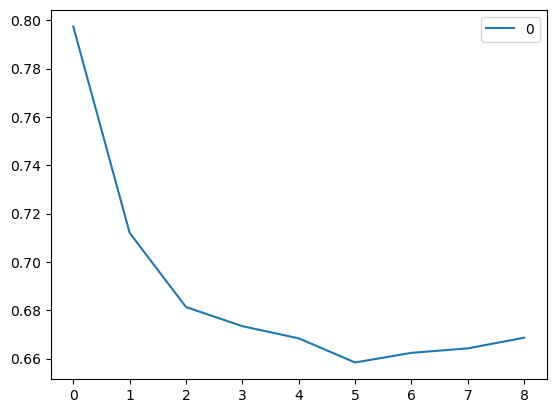

In [168]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [171]:
#use best k in valid data
knn = KNeighborsClassifier(n_neighbors=6).fit(validNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'zdensity', 'zpH','zsulphates','zalcohol']], validNorm['quality'])
distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

[5]
Distances [[0.         0.62350434 0.67014874 0.72576342 0.75080402 0.76951908]]
Indices [[ 37 420  22 344 486  11]]
      zfixed acidity  zvolatile acidity  zresidual sugar  zchlorides  \
1271       -0.581141          -0.510803        -0.698206   -0.814215   
273         0.034181           1.029726        -0.090912   -0.259223   
1397       -0.581141           0.329486        -0.394559   -0.177002   
1525       -0.916771          -0.286726        -0.318647   -0.505886   
873         0.425750          -1.799246        -0.698206   -0.444220   
541         0.649503          -0.398765         2.869645   -0.505886   

      zfree sulfur dioxide  zdensity       zpH  zsulphates  zalcohol  quality  
1271              0.794871 -1.704871  0.416115   -0.532033  1.193317        6  
273              -0.565738  0.304180 -0.024899   -0.135724 -0.970260        5  
1397              0.114566 -0.483785 -0.213905   -0.815111 -0.499917        5  
1525              0.211753 -0.650771  0.101105   -0.135

## 3 Classification

# Regression Tree

In [173]:
wine_df = pd.read_csv('redwine.csv', sep=';')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [174]:
wine_df['quality'] = wine_df['quality'].astype('category')

In [175]:
category_mapping = {1: '1', 2: '1', 3: '1', 4: '1', 5: '2', 6: '2', 7: '3', 8: '3', 9: '3', 10: '3'}

# Map the quality ratings to categories
wine_df['Category'] = wine_df['quality'].map(category_mapping)

In [176]:
wine_df.Category.value_counts()

2    1319
3     217
1      63
Name: Category, dtype: int64

Text(0.5, 0, '\nTypes of Wine')

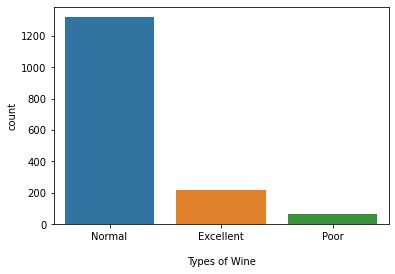

In [177]:
#sns.set_style("white")
#
#plt.figure(figsize=(15, 4))
sns.countplot(x='Category', data= wine_df)
plt.xticks([0,1,2],['Normal', 'Excellent', 'Poor'])
plt.xlabel("\nTypes of Wine")

In [116]:
wine_df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
Category                  object
dtype: object

In [117]:
wine_df.drop(columns=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [118]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(wine_df.drop(columns=['Category']), wine_df['Category'])

#print("Classes: {}".format(', '.join(classTree.classes_)))
print("Classes: {}".format(', '.join(map(str, classTree.classes_))))


Classes: 1, 2, 3


In [156]:
def quality(variables):
    color_palette='rocket'
    plt.figure(figsize=(16, 5))
    sns.histplot(data=wine_df, x=variables, hue="Category", palette=color_palette, kde=True,bins=20)
    #plt.legend(['bad wine', 'good wine'])
    if quality == "density": plt.title(f"\n{variables} of red wine\n\n")
    else: plt.title(f"\n{variables} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{wine_df[variables].describe()}')
    sns.despine()

In [157]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Category'],
      dtype='object')

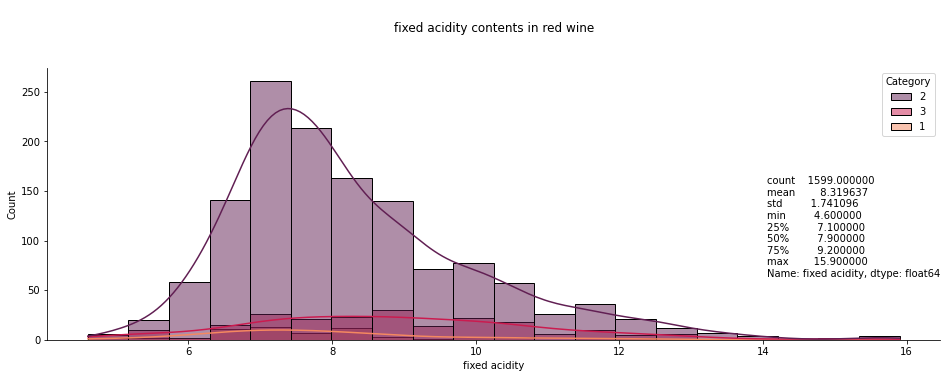

In [158]:
quality("fixed acidity")

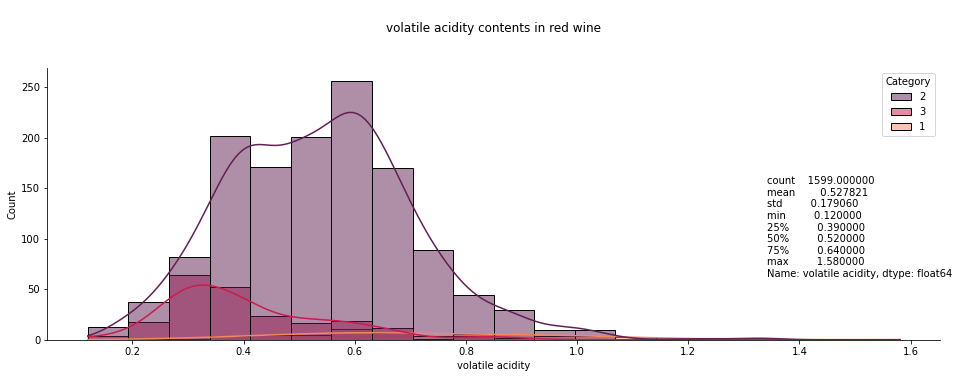

In [159]:
quality('volatile acidity')

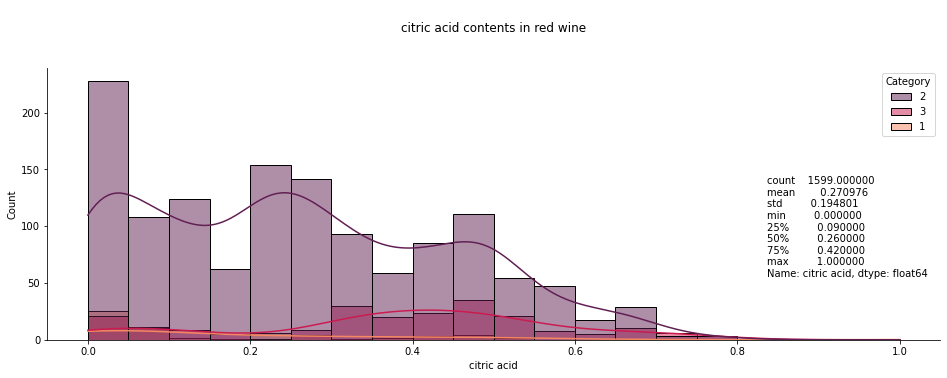

In [160]:
quality('citric acid')

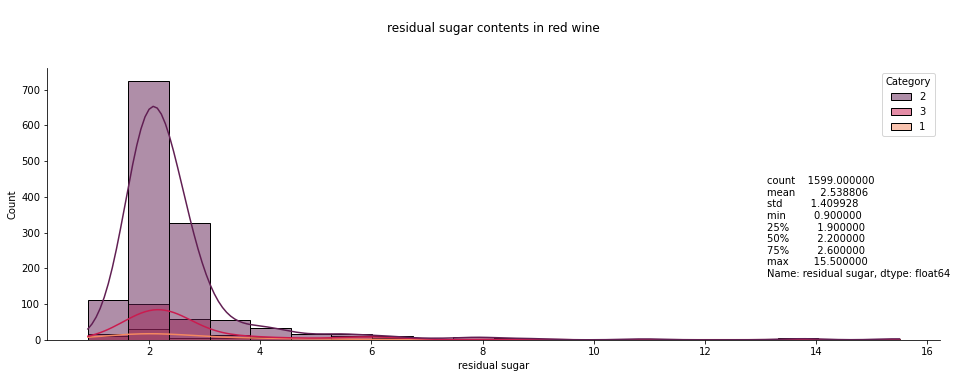

In [132]:
quality('residual sugar')

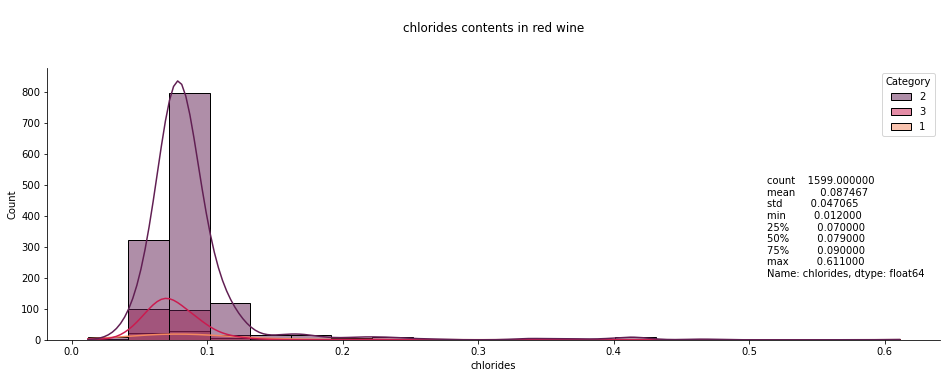

In [161]:
quality('chlorides')

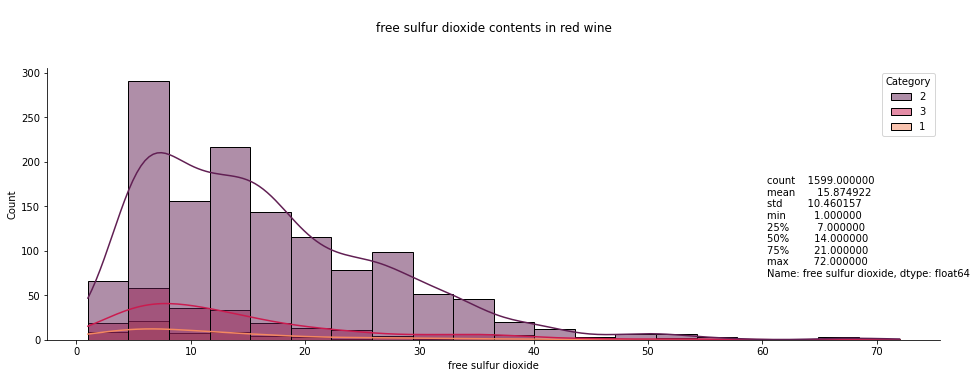

In [164]:
quality('free sulfur dioxide')

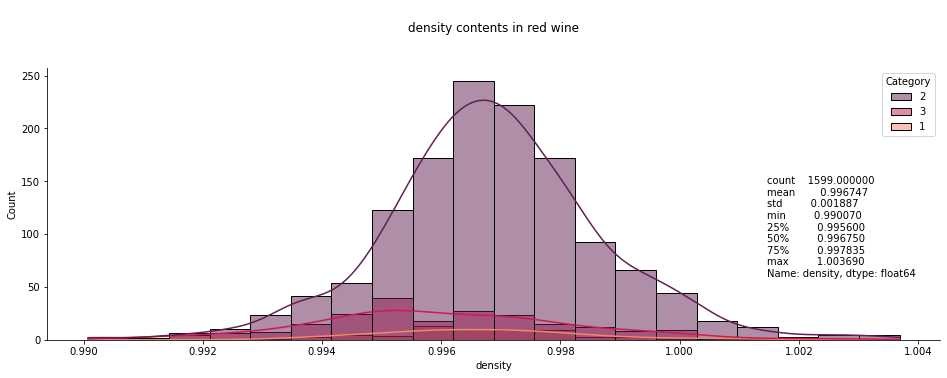

In [165]:
quality('density')

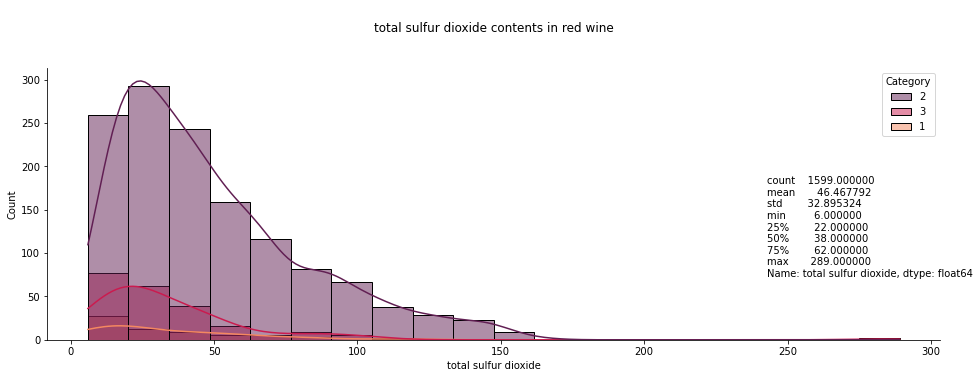

In [166]:
quality('total sulfur dioxide')

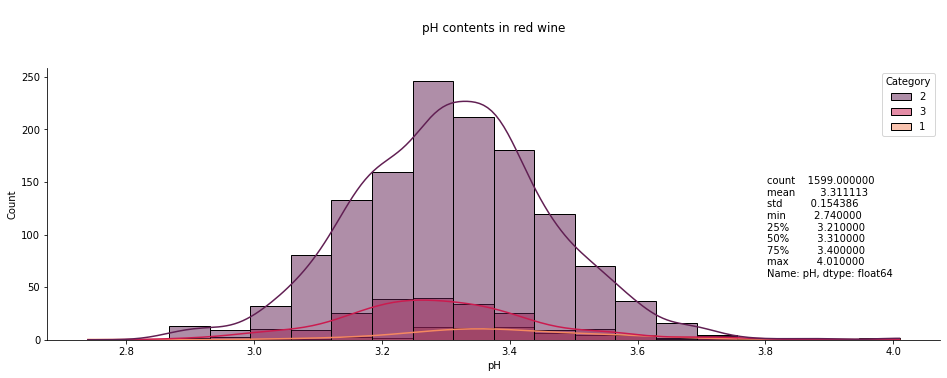

In [169]:
quality('pH')

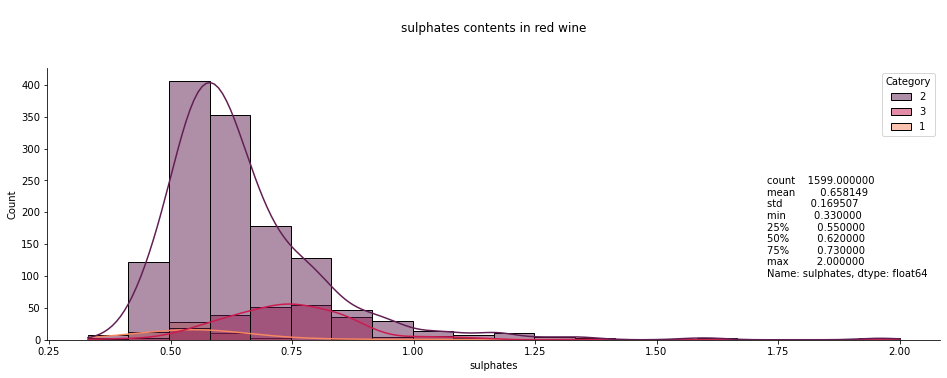

In [170]:
quality('sulphates')

In [171]:
predictors = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid',
              'density', 'pH','sulphates','alcohol']
outcome = 'Category'

# partition data
X = wine_df[predictors]
y = wine_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


#Develop trees
classTreeBank = DecisionTreeClassifier(random_state=0, max_depth=7)
classTreeBank.fit(train_X, train_y)
classificationSummary(valid_y, classTreeBank.predict(valid_X))

Confusion Matrix (Accuracy 0.8094)

       Prediction
Actual   0   1   2
     0   4  22   1
     1  10 476  43
     2   0  46  38


In [172]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.802', '0.786', '0.760', '0.792', '0.764']
Accuracy: 0.781 (+/- 0.032)
Accuracy: 0.781 (+/- 0.016)


Small Classification Tree with Control Parameters


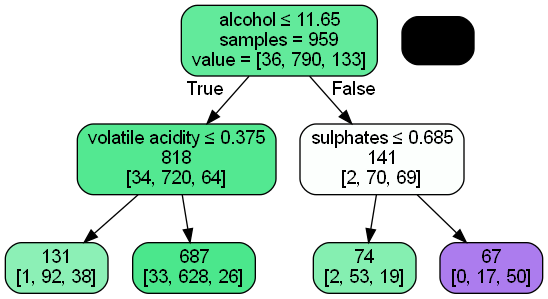

In [85]:
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [86]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)


Initial score:  0.8529886561954625
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [87]:

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(5, 30)), 
    'min_impurity_decrease': [0.009, 0.01, 0.011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.8529886561954625
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.009, 'min_samples_split': 5}


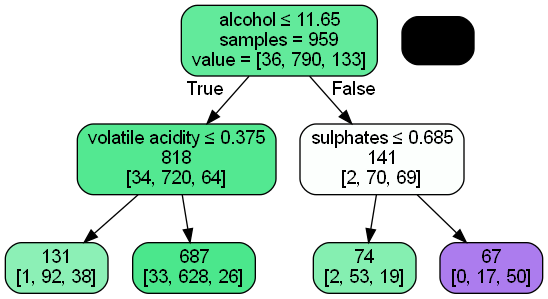

In [88]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [89]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8328)

       Prediction
Actual   0   1   2
     0   0  27   0
     1   0 511  18
     2   0  62  22


In [90]:
print(classification_report(valid_y, bestClassTree.predict(valid_X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.85      0.97      0.91       529
           3       0.55      0.26      0.35        84

    accuracy                           0.83       640
   macro avg       0.47      0.41      0.42       640
weighted avg       0.78      0.83      0.79       640



C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# random Forest

In [187]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                 feature  importance       std
4    free sulfur dioxide    0.058995  0.023973
8                     pH    0.065017  0.025449
3              chlorides    0.071593  0.025310
2         residual sugar    0.073813  0.026370
0          fixed acidity    0.076807  0.030915
5   total sulfur dioxide    0.081605  0.028766
7                density    0.083906  0.034817
6            citric acid    0.086713  0.037598
9              sulphates    0.115725  0.033547
1       volatile acidity    0.130132  0.045441
10               alcohol    0.155693  0.049704


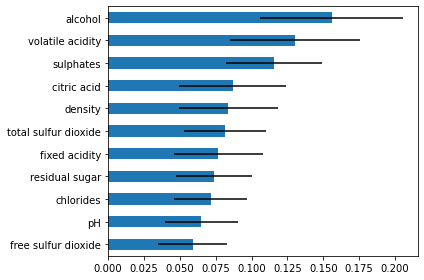

In [188]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [189]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8594)

       Prediction
Actual   0   1   2
     0   1  26   0
     1   1 507  21
     2   0  42  42


In [190]:
print(classification_report(valid_y, rf.predict(valid_X)))

              precision    recall  f1-score   support

           1       0.50      0.04      0.07        27
           2       0.88      0.96      0.92       529
           3       0.67      0.50      0.57        84

    accuracy                           0.86       640
   macro avg       0.68      0.50      0.52       640
weighted avg       0.84      0.86      0.84       640



In [182]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [183]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(train_X,train_y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8623636561954624
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


# Boosted Tree

In [191]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [192]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.8484)

       Prediction
Actual   0   1   2
     0   4  22   1
     1   6 501  22
     2   0  46  38


In [194]:
print(classification_report(valid_y, boost.predict(valid_X)))

              precision    recall  f1-score   support

           1       0.40      0.15      0.22        27
           2       0.88      0.95      0.91       529
           3       0.62      0.45      0.52        84

    accuracy                           0.85       640
   macro avg       0.63      0.52      0.55       640
weighted avg       0.83      0.85      0.83       640



# Logistic Regression

In [205]:
logit_reg = LogisticRegression(solver='liblinear', multi_class='auto')
logit_reg.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [206]:
#use only in validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8313)

       Prediction
Actual   0   1   2
     0   0  26   1
     1   0 509  20
     2   0  61  23


In [208]:
print(classification_report(valid_y, logit_reg.predict(valid_X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.85      0.96      0.90       529
           3       0.52      0.27      0.36        84

    accuracy                           0.83       640
   macro avg       0.46      0.41      0.42       640
weighted avg       0.77      0.83      0.80       640



/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [98]:
#almost all classes are classifying as average quality. (This is because of class imbalance). But also in real time only the moderate quality sales are more than bad and best quality.

# KNN

In [195]:
#Partition the data into train and valid. Make sure you set seed
trainData, validData = train_test_split(wine_df, test_size=0.40, random_state=1)

In [196]:
wine_df_new = pd.DataFrame([{'fixed acidity': 7.8, 'volatile acidity': 0.58,'citric acid':0.02 ,'residual sugar':2,'chlorides':0.073,'free sulfur dioxide':9.0, 'total sulfur dioxide':18.0,'density':0.9968 ,'pH':3.36 ,'sulphates':0.57,'alcohol':9.5 }])
wine_df_new 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.8,0.58,0.02,2,0.073,9.0,18.0,0.9968,3.36,0.57,9.5


In [197]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','citric acid',
              'density', 'pH','sulphates','alcohol']])  # Note the use of an array of column names

# Transform the full dataset
wine_df_knn = pd.concat([pd.DataFrame(scaler.transform(wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide','citric acid','density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']),
                       wine_df[['Category']]], axis=1)
trainNorm = wine_df_knn.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = wine_df_knn.iloc[validData.index]

#Scale the new data
wine_df_knn_Norm = pd.DataFrame(scaler.transform(wine_df_new [['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide','citric acid','density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
             'ztotal sulfur dioxide','zcitric acid', 'zdensity', 'zpH','zsulphates','zalcohol'])

In [198]:
knn = KNeighborsClassifier(n_neighbors=5).fit(trainNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']], trainNorm['Category'])
distances, indices = knn.kneighbors(wine_df_knn_Norm)
print(knn.predict(wine_df_knn_Norm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

['2']
Distances [[0.58485963 0.78278317 0.80790264 0.83298089 0.8411869 ]]
Indices [[460 105  76 634 795]]
      zfixed acidity  zvolatile acidity  zresidual sugar  zchlorides  \
29         -0.301449           0.637591        -0.394559   -0.135892   
117        -0.301449           0.161428        -0.394559   -0.135892   
322        -0.301449           0.497543        -0.166824   -0.197558   
70         -0.357387           0.553563        -0.470471   -0.259223   
1236       -0.301449           0.105409        -0.622294   -0.382555   

      zfree sulfur dioxide  ztotal sulfur dioxide  zcitric acid  zdensity  \
29               -0.760111              -0.923351     -1.363437 -0.191559   
117              -0.857298              -0.554434     -0.759959  0.121539   
322              -0.954484              -0.861865     -1.111988  0.304180   
70               -0.079806              -0.585177     -0.961118 -0.035010   
1236             -0.857298              -0.892608     -1.363437 -0.092412  

In [199]:
train_X = trainNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
             'ztotal sulfur dioxide','zcitric acid', 'zdensity', 'zpH','zsulphates','zalcohol']]
train_y = trainNorm['Category']
valid_X = validNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']]
valid_y = validNorm['Category']

# Train a classifier for different values of k
results = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.821875
1    2  0.812500
2    3  0.826562
3    4  0.832812
4    5  0.828125
5    6  0.817187
6    7  0.820312
7    8  0.826562
8    9  0.826562
9   10  0.826562
10  11  0.831250
11  12  0.832812
12  13  0.831250
13  14  0.823438
14  15  0.825000
15  16  0.828125
16  17  0.828125
17  18  0.829688
18  19  0.831250


In [203]:
#develop the knn model with best k
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X))

Confusion Matrix (Accuracy 0.8313)

       Prediction
Actual   0   1   2
     0   0  26   1
     1   0 501  28
     2   0  53  31


In [204]:
print(classification_report(valid_y, knn_model.predict(valid_X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.86      0.95      0.90       529
           3       0.52      0.37      0.43        84

    accuracy                           0.83       640
   macro avg       0.46      0.44      0.44       640
weighted avg       0.78      0.83      0.80       640



/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/varshinikuppuraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [107]:
#Cross Validation

In [209]:
from sklearn.model_selection import cross_val_score
model_names, cv_scores = [], []

In [210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,train_X,train_y,cv=5)

model_names.append("Logistic Regression")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Logistic Regression Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Logistic Regression Cross Validation Accuracy score: 84.98%


In [211]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,train_X,train_y,cv=5)
model_names.append("Decision Tree Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Decision Tree Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Decision Tree Classifier Cross Validation Accuracy score: 78.73%


In [212]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,train_X,train_y,cv=5)
model_names.append("Random Forest Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Random Forest Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Random Forest Classifier Cross Validation Accuracy score: 85.82%


In [213]:
boost = GradientBoostingClassifier(random_state=1)
cv = cross_val_score(boost,train_X,train_y,cv=5)
model_names.append("Boosting Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Boosting Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))


Boosting Classifier Cross Validation Accuracy score: 84.57%


In [214]:
knn = KNeighborsClassifier(n_neighbors=10)
cv = cross_val_score(knn,train_X, train_y,cv=5)
model_names.append("KNN Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('KNN Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

KNN Cross Validation Accuracy score: 83.11%


In [215]:
model_names, cv_scores

model_acc_cv_df = pd.DataFrame(list(zip(model_names,cv_scores)), columns=["Model", "CV Score"])
model_acc_cv_df.index = np.arange(1, len(model_acc_cv_df)+1)
model_acc_cv_df

,Model,CV Score
1,Logistic Regression,84.98 %
2,Decision Tree Classifier,78.73 %
3,Random Forest Classifier,85.82 %
4,Boosting Classifier,84.57 %
5,KNN Classifier,83.11 %


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [117]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(train_X,train_y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8623636561954624
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


## 2 Class

# Regression Tree

In [2]:
wine_df = pd.read_csv('redwine.csv', sep=';')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df['quality'] = wine_df['quality'].astype('category')

In [4]:
category_mapping = {1: '0', 2: '0', 3: '0', 4: '0', 5: '0', 6: '0', 7: '1', 8: '1', 9: '1', 10: '1'}

# Map the quality ratings to categories
wine_df['Category'] = wine_df['quality'].map(category_mapping)

In [5]:
wine_df.Category.value_counts()

0    1382
1     217
Name: Category, dtype: int64

Text(0.5, 0, '\nTypes of Wine')

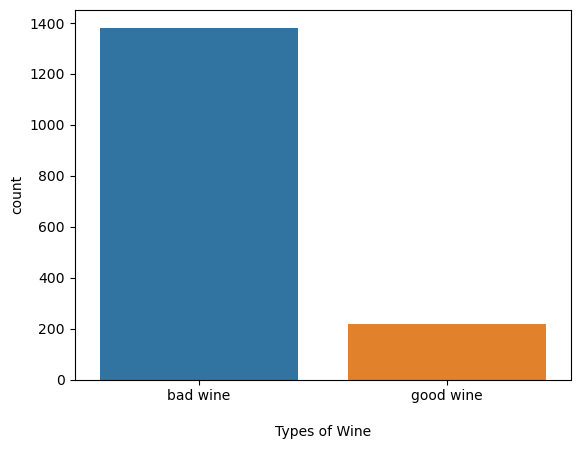

In [6]:
#sns.set_style("white")
#
#plt.figure(figsize=(15, 4))
sns.countplot(x='Category', data= wine_df)
plt.xticks([0,1],['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")

In [7]:
wine_df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
Category                  object
dtype: object

In [8]:
wine_df.drop(columns=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [9]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(wine_df.drop(columns=['Category']), wine_df['Category'])

#print("Classes: {}".format(', '.join(classTree.classes_)))
print("Classes: {}".format(', '.join(map(str, classTree.classes_))))


Classes: 0, 1


In [10]:
predictors = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid',
              'density', 'pH','sulphates','alcohol']
outcome = 'Category'

# partition data
X = wine_df[predictors]
y = wine_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


#Develop trees
classTreeBank = DecisionTreeClassifier(random_state=0, max_depth=7)
classTreeBank.fit(train_X, train_y)
classificationSummary(valid_y, classTreeBank.predict(valid_X))

Confusion Matrix (Accuracy 0.8578)

       Prediction
Actual   0   1
     0 512  44
     1  47  37


In [11]:
print(classification_report(valid_y, classTreeBank.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       556
           1       0.46      0.44      0.45        84

    accuracy                           0.86       640
   macro avg       0.69      0.68      0.68       640
weighted avg       0.86      0.86      0.86       640



In [12]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.880', '0.865', '0.839', '0.891', '0.832']
Accuracy: 0.861 (+/- 0.045)
Accuracy: 0.861 (+/- 0.023)


Small Classification Tree with Control Parameters


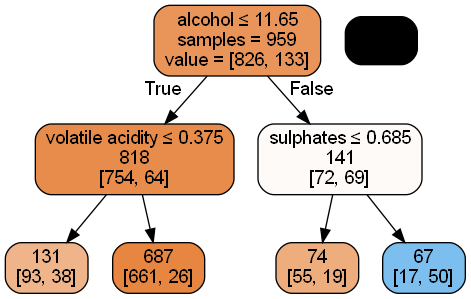

In [13]:
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [31]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)


Initial score:  0.890526832460733
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 40}


In [32]:

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(5, 30)), 
    'min_impurity_decrease': [0.009, 0.01, 0.011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.8905268324607329
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.009, 'min_samples_split': 5}


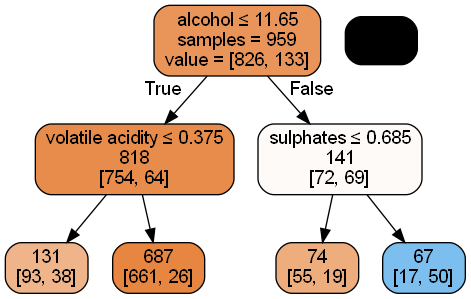

In [15]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [33]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8750)

       Prediction
Actual   0   1
     0 538  18
     1  62  22


In [34]:
print(classification_report(valid_y, bestClassTree.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       556
           1       0.55      0.26      0.35        84

    accuracy                           0.88       640
   macro avg       0.72      0.61      0.64       640
weighted avg       0.85      0.88      0.86       640



# random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                 feature  importance       std
4    free sulfur dioxide    0.054920  0.026588
8                     pH    0.061372  0.029952
2         residual sugar    0.069076  0.028136
3              chlorides    0.069938  0.032256
5   total sulfur dioxide    0.070653  0.031364
0          fixed acidity    0.074554  0.033267
7                density    0.087251  0.042160
6            citric acid    0.087500  0.043325
9              sulphates    0.124592  0.044951
1       volatile acidity    0.124932  0.055498
10               alcohol    0.175212  0.062840


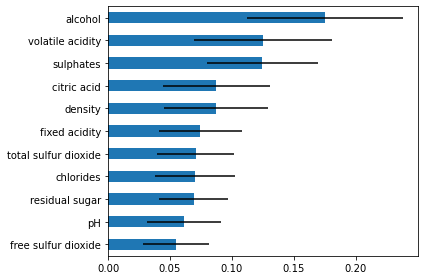

In [36]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [37]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9062)

       Prediction
Actual   0   1
     0 539  17
     1  43  41


In [38]:
print(classification_report(valid_y, rf.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       556
           1       0.71      0.49      0.58        84

    accuracy                           0.91       640
   macro avg       0.82      0.73      0.76       640
weighted avg       0.90      0.91      0.90       640



In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [41]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(train_X,train_y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.9051101657940663
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


# Boosted Tree

In [241]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [242]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.8844)

       Prediction
Actual   0   1
     0 530  26
     1  48  36


In [250]:
print(classification_report(valid_y, boost.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       556
           1       0.58      0.43      0.49        84

    accuracy                           0.88       640
   macro avg       0.75      0.69      0.71       640
weighted avg       0.87      0.88      0.88       640



# Logistic Regression

In [251]:
logit_reg = LogisticRegression(solver='liblinear', multi_class='auto')
logit_reg.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [252]:
#use only in validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8719)

       Prediction
Actual   0   1
     0 535  21
     1  61  23


In [253]:
print(classification_report(valid_y, logit_reg.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       556
           1       0.52      0.27      0.36        84

    accuracy                           0.87       640
   macro avg       0.71      0.62      0.64       640
weighted avg       0.85      0.87      0.85       640



# KNN

In [254]:
#Partition the data into train and valid. Make sure you set seed
trainData, validData = train_test_split(wine_df, test_size=0.40, random_state=1)

In [255]:
wine_df_new = pd.DataFrame([{'fixed acidity': 7.8, 'volatile acidity': 0.58,'citric acid':0.02 ,'residual sugar':2,'chlorides':0.073,'free sulfur dioxide':9.0, 'total sulfur dioxide':18.0,'density':0.9968 ,'pH':3.36 ,'sulphates':0.57,'alcohol':9.5 }])
wine_df_new 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.8,0.58,0.02,2,0.073,9.0,18.0,0.9968,3.36,0.57,9.5


In [256]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','citric acid',
              'density', 'pH','sulphates','alcohol']])  # Note the use of an array of column names

# Transform the full dataset
wine_df_knn = pd.concat([pd.DataFrame(scaler.transform(wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide','citric acid','density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']),
                       wine_df[['Category']]], axis=1)
trainNorm = wine_df_knn.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = wine_df_knn.iloc[validData.index]

#Scale the new data
wine_df_knn_Norm = pd.DataFrame(scaler.transform(wine_df_new [['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide','citric acid','density', 'pH','sulphates','alcohol']]), 
                                    columns=['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
             'ztotal sulfur dioxide','zcitric acid', 'zdensity', 'zpH','zsulphates','zalcohol'])

In [257]:
knn = KNeighborsClassifier(n_neighbors=5).fit(trainNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']], trainNorm['Category'])
distances, indices = knn.kneighbors(wine_df_knn_Norm)
print(knn.predict(wine_df_knn_Norm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

['0']
Distances [[0.58485963 0.78278317 0.80790264 0.83298089 0.8411869 ]]
Indices [[460 105  76 634 795]]
      zfixed acidity  zvolatile acidity  zresidual sugar  zchlorides  \
29         -0.301449           0.637591        -0.394559   -0.135892   
117        -0.301449           0.161428        -0.394559   -0.135892   
322        -0.301449           0.497543        -0.166824   -0.197558   
70         -0.357387           0.553563        -0.470471   -0.259223   
1236       -0.301449           0.105409        -0.622294   -0.382555   

      zfree sulfur dioxide  ztotal sulfur dioxide  zcitric acid  zdensity  \
29               -0.760111              -0.923351     -1.363437 -0.191559   
117              -0.857298              -0.554434     -0.759959  0.121539   
322              -0.954484              -0.861865     -1.111988  0.304180   
70               -0.079806              -0.585177     -0.961118 -0.035010   
1236             -0.857298              -0.892608     -1.363437 -0.092412  

In [258]:
train_X = trainNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
             'ztotal sulfur dioxide','zcitric acid', 'zdensity', 'zpH','zsulphates','zalcohol']]
train_y = trainNorm['Category']
valid_X = validNorm[['zfixed acidity', 'zvolatile acidity', 'zresidual sugar', 'zchlorides', 'zfree sulfur dioxide', 
              'ztotal sulfur dioxide','zcitric acid','zdensity', 'zpH','zsulphates','zalcohol']]
valid_y = validNorm['Category']

# Train a classifier for different values of k
results = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.873437
1    2  0.878125
2    3  0.873437
3    4  0.876563
4    5  0.870313
5    6  0.864062
6    7  0.864062
7    8  0.868750
8    9  0.871875
9   10  0.873437
10  11  0.871875
11  12  0.873437
12  13  0.871875
13  14  0.867188
14  15  0.865625
15  16  0.868750
16  17  0.868750
17  18  0.870313
18  19  0.871875


In [259]:
#develop the knn model with best k
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X))

Confusion Matrix (Accuracy 0.8734)

       Prediction
Actual   0   1
     0 532  24
     1  57  27


In [260]:
cm_knn = confusion_matrix(valid_y, knn_model.predict(valid_X))
cm_knn

array([[532,  24],
       [ 57,  27]])

In [261]:
print(classification_report(valid_y, knn_model.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       556
           1       0.53      0.32      0.40        84

    accuracy                           0.87       640
   macro avg       0.72      0.64      0.66       640
weighted avg       0.85      0.87      0.86       640



In [34]:
#Cross Validation

In [262]:
from sklearn.model_selection import cross_val_score
model_names, cv_scores = [], []

In [263]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,train_X,train_y,cv=5)

model_names.append("Logistic Regression")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Logistic Regression Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Logistic Regression Cross Validation Accuracy score: 88.43%


In [264]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,train_X,train_y,cv=5)
model_names.append("Decision Tree Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Decision Tree Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Decision Tree Classifier Cross Validation Accuracy score: 86.23%


In [265]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,train_X,train_y,cv=5)
model_names.append("Random Forest Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Random Forest Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Random Forest Classifier Cross Validation Accuracy score: 90.09%


In [266]:
boost = GradientBoostingClassifier(random_state=1)
cv = cross_val_score(boost,train_X,train_y,cv=5)
model_names.append("Boosting Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Boosting Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))


Boosting Classifier Cross Validation Accuracy score: 90.20%


In [267]:
knn = KNeighborsClassifier(n_neighbors=10)
cv = cross_val_score(knn,train_X, train_y,cv=5)
model_names.append("KNN Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('KNN Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

KNN Cross Validation Accuracy score: 87.17%


In [268]:
model_names, cv_scores

model_acc_cv_df = pd.DataFrame(list(zip(model_names,cv_scores)), columns=["Model", "CV Score"])
model_acc_cv_df.index = np.arange(1, len(model_acc_cv_df)+1)
model_acc_cv_df

,Model,CV Score
1,Logistic Regression,88.43 %
2,Decision Tree Classifier,86.23 %
3,Random Forest Classifier,90.09 %
4,Boosting Classifier,90.2 %
5,KNN Classifier,87.17 %


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.9051101657940663
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
